# MODEL FOR SENTIMENT ANALYSIS

In [164]:
import pandas as pd

In [165]:
data = pd.read_excel("C:\\Users\\vicky\\OneDrive\\Desktop\\finalmp\\reviewscore2.xlsx")
data


,review,sentiment
0,எந்த படம் வந்ததாலும் தியேட்டர் வாசல் மிதிக்காம...,0
1,எந்த படம் வந்தாலும் HD Print வரும் வரை காத்திர...,0
2,பல்லு விளக்காமல் வீடியோ பார்த்துக்கொண்டே போனை ...,0
3,வெந்து தணிந்தது காடு STR க்கு வணக்கத்த போடு ....,1
4,Review கேட்டா எல்லாரும் பெரிய Director,1
...,...,...
1978,கரு : அலட்சியத்தால் மூடப்படாது இந்தியாவில் இது...,1
1979,"கரு : ராசியில்லா ராசாவும் ,ராசியான ராணியும் ஜோ...",0
1980,"கரு : தங்கள் கெளரவத்திற்காக., தங்கள் வாரிசுகளு...",0
1981,நயன்தாரா படங்கள் என்றால் ரசிகர்கள் மத்தியில் த...,1


In [166]:
import pandas as pd

In [167]:
data['sentiment'].value_counts()

1    1103
0     880
Name: sentiment, dtype: int64

In [168]:
data=data[['review','sentiment']]

In [169]:
data

,review,sentiment
0,எந்த படம் வந்ததாலும் தியேட்டர் வாசல் மிதிக்காம...,0
1,எந்த படம் வந்தாலும் HD Print வரும் வரை காத்திர...,0
2,பல்லு விளக்காமல் வீடியோ பார்த்துக்கொண்டே போனை ...,0
3,வெந்து தணிந்தது காடு STR க்கு வணக்கத்த போடு ....,1
4,Review கேட்டா எல்லாரும் பெரிய Director,1
...,...,...
1978,கரு : அலட்சியத்தால் மூடப்படாது இந்தியாவில் இது...,1
1979,"கரு : ராசியில்லா ராசாவும் ,ராசியான ராணியும் ஜோ...",0
1980,"கரு : தங்கள் கெளரவத்திற்காக., தங்கள் வாரிசுகளு...",0
1981,நயன்தாரா படங்கள் என்றால் ரசிகர்கள் மத்தியில் த...,1


In [170]:
data["review"][60]

'சினம் படம் விளம்பரம் போட்டு இருக்க...'

In [171]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_recall_fscore_support as score

In [172]:
X = data["review"]
y = data["sentiment"]


In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=1,stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1586,)
(397,)
(1586,)
(397,)


In [174]:
vectorizer = CountVectorizer(analyzer='word',
                        max_df=0.9,
                        max_features=1000,
                        ngram_range=(1, 3))

X_train_dtm = vectorizer.fit_transform(X_train)
X_test_dtm = vectorizer.transform(X_test)


In [175]:
X_train_dtm.dtype

dtype('int64')

In [176]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [177]:
models = [MultinomialNB,LogisticRegression,RandomForestClassifier,SVC]

def fit_models(X_train,y_train,X_test,y_test,model):
    model = model()
    model.fit(X_train,y_train)
    return model


In [178]:
mnb = fit_models(X_train_dtm,y_train,X_test_dtm,y_test,models[0])
# make class predictions for X_test_dtm
y0_pred_class = mnb.predict(X_test_dtm)

# calculate accuracy of class predictions
print('Accuracy Score:',metrics.accuracy_score(y_test, y0_pred_class))


# calculate precision and recall
print(classification_report(y_test, y0_pred_class))


# calculate the confusion matrix
print(metrics.confusion_matrix(y_test, y0_pred_class))


Accuracy Score: 0.6448362720403022
              precision    recall  f1-score   support

           0       0.63      0.49      0.55       176
           1       0.66      0.76      0.71       221

    accuracy                           0.64       397
   macro avg       0.64      0.63      0.63       397
weighted avg       0.64      0.64      0.64       397

[[ 87  89]
 [ 52 169]]


In [179]:
import matplotlib.pyplot as plt

In [180]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [181]:
print(precision_score(y_test, y0_pred_class))
print(recall_score(y_test, y0_pred_class))
print(f1_score(y_test, y0_pred_class))

0.6550387596899225
0.7647058823529411
0.7056367432150313


In [182]:
import seaborn as sns

<AxesSubplot:>

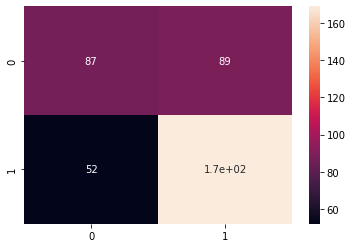

In [183]:
sns.heatmap(confusion_matrix(y_test, y0_pred_class),annot =True)

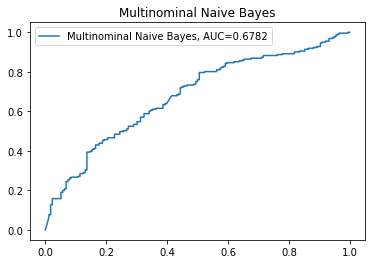

In [184]:
plt.figure(0).clf()

y_pred = mnb.predict_proba(X_test_dtm)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Multinominal Naive Bayes, AUC="+str(auc))
plt.title("Multinominal Naive Bayes")
plt.legend()

In [185]:
lr = fit_models(X_train_dtm,y_train,X_test_dtm,y_test,models[1])
# make class predictions for X_test_dtm
y1_pred_class = lr.predict(X_test_dtm)

# calculate accuracy of class predictions
print('Accuracy Score:',metrics.accuracy_score(y_test, y1_pred_class))

# calculate precision and recall
print(classification_report(y_test, y1_pred_class))

# calculate the confusion matrix
print(metrics.confusion_matrix(y_test, y1_pred_class))

Accuracy Score: 0.7707808564231738
              precision    recall  f1-score   support

           0       0.76      0.71      0.73       176
           1       0.78      0.82      0.80       221

    accuracy                           0.77       397
   macro avg       0.77      0.76      0.77       397
weighted avg       0.77      0.77      0.77       397

[[125  51]
 [ 40 181]]


C:\Users\vicky\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



<AxesSubplot:>

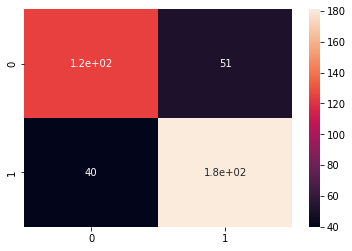

In [186]:
sns.heatmap(confusion_matrix(y_test, y1_pred_class),annot =True)

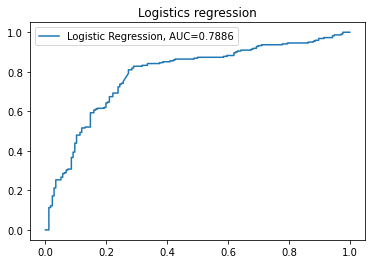

In [187]:
plt.figure(0).clf()

y_pred = lr.predict_proba(X_test_dtm)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))
plt.title("Logistics regression")
plt.legend()

In [188]:
print(precision_score(y_test, y1_pred_class))
print(recall_score(y_test, y1_pred_class))
print(f1_score(y_test, y1_pred_class))

0.7801724137931034
0.8190045248868778
0.7991169977924946


In [189]:
rf = fit_models(X_train_dtm,y_train,X_test_dtm,y_test,models[2])
# make class predictions for X_test_dtm
y2_pred_class = rf.predict(X_test_dtm)

# calculate accuracy of class predictions
print('Accuracy Score:',metrics.accuracy_score(y_test, y2_pred_class))


# calculate precision and recall
print(classification_report(y_test, y2_pred_class))


# calculate the confusion matrix
print(metrics.confusion_matrix(y_test, y2_pred_class))


Accuracy Score: 0.8110831234256927
              precision    recall  f1-score   support

           0       0.80      0.77      0.78       176
           1       0.82      0.85      0.83       221

    accuracy                           0.81       397
   macro avg       0.81      0.81      0.81       397
weighted avg       0.81      0.81      0.81       397

[[135  41]
 [ 34 187]]


<AxesSubplot:>

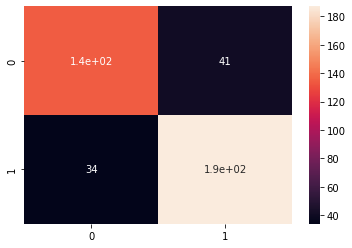

In [190]:
sns.heatmap(confusion_matrix(y_test, y2_pred_class),annot =True)

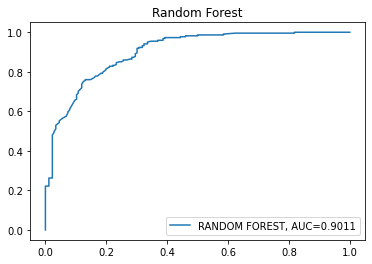

In [191]:
plt.figure(0).clf()

y_pred = rf.predict_proba(X_test_dtm)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="RANDOM FOREST, AUC="+str(auc))
plt.title("Random Forest")
plt.legend()

In [192]:
print(precision_score(y_test, y2_pred_class))
print(recall_score(y_test, y2_pred_class))
print(f1_score(y_test, y2_pred_class))

0.8201754385964912
0.8461538461538461
0.8329621380846326


In [193]:
svc = fit_models(X_train_dtm,y_train,X_test_dtm,y_test,models[3])
# make class predictions for X_test_dtm
y3_pred_class = svc.predict(X_test_dtm)

# calculate accuracy of class predictions
print('Accuracy Score:',metrics.accuracy_score(y_test, y3_pred_class))


# calculate precision and recall
print(classification_report(y_test, y3_pred_class))


# calculate the confusion matrix
print(metrics.confusion_matrix(y_test, y3_pred_class))


Accuracy Score: 0.6020151133501259
              precision    recall  f1-score   support

           0       0.78      0.14      0.24       176
           1       0.59      0.97      0.73       221

    accuracy                           0.60       397
   macro avg       0.68      0.56      0.49       397
weighted avg       0.67      0.60      0.51       397

[[ 25 151]
 [  7 214]]


<AxesSubplot:>

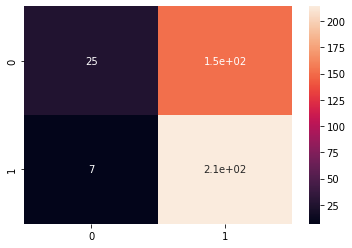

In [194]:
sns.heatmap(confusion_matrix(y_test, y3_pred_class),annot =True)

In [195]:
print(precision_score(y_test, y3_pred_class))
print(recall_score(y_test, y3_pred_class))
print(f1_score(y_test, y3_pred_class))

0.5863013698630137
0.9683257918552036
0.7303754266211604


# MODEL TEST 

In [196]:
test=pd.read_excel("C:\\Users\\vicky\\OneDrive\\Desktop\\moviereview.xlsx")

In [197]:
test

,Review
0,சார்பட்டா பரம்பரை படம் தியேட்டர்ல வந்திருந்தா...
1,உலக தரமான திரைப்படம் மிக பெரிய அங்கிகாரம் அடை...
2,இப்பிடி ஒரு படம் இனி வருமானு தெறில்ல.... கொண்ட...
3,அண்ணா படம் சாத்தியமா வேற லெவல் ஆர்யாவிக்கு நல்...
4,தியேட்டர் திறந்த பின்பு மீண்டும் தியேட்டர்ல சா...
...,...
257,பக்கா
258,parupu mathiri pesura
259,Kala kabali mokka padama poda punda
260,Mokka Film


In [198]:
import langid

In [199]:
test["languages"] = test["Review"].apply(lambda x : langid.classify(str(x))[0])

In [200]:
test

,Review,languages
0,சார்பட்டா பரம்பரை படம் தியேட்டர்ல வந்திருந்தா...,ta
1,உலக தரமான திரைப்படம் மிக பெரிய அங்கிகாரம் அடை...,ta
2,இப்பிடி ஒரு படம் இனி வருமானு தெறில்ல.... கொண்ட...,ta
3,அண்ணா படம் சாத்தியமா வேற லெவல் ஆர்யாவிக்கு நல்...,ta
4,தியேட்டர் திறந்த பின்பு மீண்டும் தியேட்டர்ல சா...,ta
...,...,...
257,பக்கா,ta
258,parupu mathiri pesura,ro
259,Kala kabali mokka padama poda punda,ms
260,Mokka Film,fi


In [201]:
test_ta = test[test["languages"]=="ta"]

In [202]:
test_ta.shape

(65, 2)

In [203]:
test_ta["Review"]= test_ta["Review"].apply(lambda x : [x])

C:\Users\vicky\AppData\Local\Temp\ipykernel_15260\1383021601.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [204]:
test_ta

,Review,languages
0,[சார்பட்டா பரம்பரை படம் தியேட்டர்ல வந்திருந்த...,ta
1,[உலக தரமான திரைப்படம் மிக பெரிய அங்கிகாரம் அட...,ta
2,[இப்பிடி ஒரு படம் இனி வருமானு தெறில்ல.... கொண்...,ta
3,[அண்ணா படம் சாத்தியமா வேற லெவல் ஆர்யாவிக்கு நல...,ta
4,[தியேட்டர் திறந்த பின்பு மீண்டும் தியேட்டர்ல ச...,ta
...,...,...
240,[Dancing rose நெருப்பு],ta
244,[எல்லாப் பணத்தையும் இப்படி சொல்லுங்க],ta
248,[சர்பேட்டா வா யாரா நீங்க?.],ta
257,[பக்கா],ta


In [205]:
test_ta["transform"]=test_ta["Review"].apply(lambda x : vectorizer.transform(x))

C:\Users\vicky\AppData\Local\Temp\ipykernel_15260\381053898.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [206]:
test_ta["pred"]=test_ta["transform"].apply(lambda x : svc.predict(x))

C:\Users\vicky\AppData\Local\Temp\ipykernel_15260\2571791619.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [207]:
def sentiment(x):
    if x==[1]:
        return "Positive"
    else:
        return "Negative"

In [208]:
test_ta["sentiment"]=test_ta["pred"].apply(lambda x : sentiment(x))

C:\Users\vicky\AppData\Local\Temp\ipykernel_15260\2654520125.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [209]:
test_ta

,Review,languages,transform,pred,sentiment
0,[சார்பட்டா பரம்பரை படம் தியேட்டர்ல வந்திருந்த...,ta,"(0, 87)\t1\n (0, 95)\t2\n (0, 363)\t1\n (...",[1],Positive
1,[உலக தரமான திரைப்படம் மிக பெரிய அங்கிகாரம் அட...,ta,"(0, 59)\t1\n (0, 64)\t1\n (0, 244)\t1\n (...",[1],Positive
2,[இப்பிடி ஒரு படம் இனி வருமானு தெறில்ல.... கொண்...,ta,"(0, 170)\t1\n (0, 173)\t1\n (0, 244)\t1\n ...",[1],Positive
3,[அண்ணா படம் சாத்தியமா வேற லெவல் ஆர்யாவிக்கு நல...,ta,"(0, 70)\t1\n (0, 137)\t1\n (0, 412)\t1\n ...",[1],Positive
4,[தியேட்டர் திறந்த பின்பு மீண்டும் தியேட்டர்ல ச...,ta,"(0, 359)\t1\n (0, 388)\t1\n (0, 555)\t2\n ...",[1],Positive
...,...,...,...,...,...
240,[Dancing rose நெருப்பு],ta,,[1],Positive
244,[எல்லாப் பணத்தையும் இப்படி சொல்லுங்க],ta,"(0, 173)\t1\n (0, 174)\t1\n (0, 303)\t1\n ...",[1],Positive
248,[சர்பேட்டா வா யாரா நீங்க?.],ta,"(0, 519)\t1",[1],Positive
257,[பக்கா],ta,"(0, 668)\t1",[1],Positive


In [210]:
import plotly.express as px

In [211]:
fig = px.histogram(test_ta, test_ta['sentiment'], color=test_ta['sentiment'])
fig.update_layout(barmode='group',autosize=False,
    width=500,
    height=500,)

fig.show()

In [212]:
test_ta["pred"]=test_ta["transform"].apply(lambda x : lr.predict(x))

C:\Users\vicky\AppData\Local\Temp\ipykernel_15260\3314153791.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [213]:
def sentiment2(x):
    if x==[1]:
        return "Positive"
    else:
        return "Negative"

In [214]:
test_ta["sentiment2"]=test_ta["pred"].apply(lambda x : sentiment2(x))

C:\Users\vicky\AppData\Local\Temp\ipykernel_15260\1199018420.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [215]:
test_ta["pred"].value_counts()

[1]    43
[0]    22
Name: pred, dtype: int64

In [216]:
fig = px.histogram(test_ta, test_ta['sentiment2'], color=test_ta['sentiment2'])
fig.update_layout(barmode='group',autosize=False,
    width=500,
    height=500,)

fig.show()

In [217]:
test_ta["pred"]=test_ta["transform"].apply(lambda x : rf.predict(x))

C:\Users\vicky\AppData\Local\Temp\ipykernel_15260\584304217.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [218]:
def sentiment3(x):
    if x==[1]:
        return "Positive"
    else:
        return "Negative"

In [219]:
test_ta["sentiment3"]=test_ta["pred"].apply(lambda x : sentiment3(x))

C:\Users\vicky\AppData\Local\Temp\ipykernel_15260\1236790911.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [220]:
test_ta["pred"].value_counts()

[1]    41
[0]    24
Name: pred, dtype: int64

In [221]:
fig = px.histogram(test_ta, test_ta['sentiment3'], color=test_ta['sentiment3'])
fig.update_layout(barmode='group',autosize=False,
    width=500,
    height=500,)

fig.show()

In [222]:
test_ta["pred"]=test_ta["transform"].apply(lambda x : mnb.predict(x))

C:\Users\vicky\AppData\Local\Temp\ipykernel_15260\643011997.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [223]:
def sentiment4(x):
    if x==[1]:
        return "Positive"
    else:
        return "Negative"

In [224]:
test_ta["sentiment4"]=test_ta["pred"].apply(lambda x : sentiment4(x))

C:\Users\vicky\AppData\Local\Temp\ipykernel_15260\3189910491.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [225]:
test_ta["pred"].value_counts()

[1]    51
[0]    14
Name: pred, dtype: int64

In [226]:
fig = px.histogram(test_ta, test_ta['sentiment4'], color=test_ta['sentiment4'])
fig.update_layout(barmode='group',autosize=False,
    width=500,
    height=500,)

fig.show()